In [1]:
import pandas as pd
import numpy as np

In [2]:
# Creating Series from list

list_str = ["Apple", "Microsoft", "Bitcoin", "Ethereum"]

stocks = pd.Series(list_str)
print(stocks)
print(type(stocks))

0        Apple
1    Microsoft
2      Bitcoin
3     Ethereum
dtype: object
<class 'pandas.core.series.Series'>


In [3]:
list_int = [100, 101, 102, 103]

stocks_price = pd.Series(list_int)
print(stocks_price)
print(type(stocks_price))

0    100
1    101
2    102
3    103
dtype: int64
<class 'pandas.core.series.Series'>


In [4]:
# Custom Index
list_int = [100, 101, 102, 103]
list_str = ["Apple", "Microsoft", "Bitcoin", "Ethereum"]

stock_data = pd.Series(list_str, index=list_int)
print(stock_data)
print(type(stock_data))

100        Apple
101    Microsoft
102      Bitcoin
103     Ethereum
dtype: object
<class 'pandas.core.series.Series'>


In [5]:
print(stock_data[100])

Apple


In [6]:
# Setting a name
list_int = [100, 101, 102, 103]
list_str = ["Apple", "Microsoft", "Bitcoin", "Ethereum"]

stock_data = pd.Series(list_str, index=list_int, name="Stock Data of Emmanuel")
print(stock_data)
print(type(stock_data))
print(stock_data.name)

100        Apple
101    Microsoft
102      Bitcoin
103     Ethereum
Name: Stock Data of Emmanuel, dtype: object
<class 'pandas.core.series.Series'>
Stock Data of Emmanuel


In [7]:
# Series from Dictionary
dict = {"Apple":101.1, "Microsoft": 123.2, "Bitcoin": 98098, "Ethereum": 198}
stock_data = pd.Series(dict)
print(stock_data)

Apple          101.1
Microsoft      123.2
Bitcoin      98098.0
Ethereum       198.0
dtype: float64


In [8]:
dict = {"Apple":101.1, "Microsoft": 123.2, "Bitcoin": 98098, "Ethereum": 198}
stock_data = pd.Series(dict, name="Stock Data of Emmanuel")
print(stock_data)

Apple          101.1
Microsoft      123.2
Bitcoin      98098.0
Ethereum       198.0
Name: Stock Data of Emmanuel, dtype: float64


In [9]:
# Series Attributes

# size
print(stock_data.size)

4


In [10]:
# dtype

print(stock_data.dtype)

float64


In [11]:
# name

print(stock_data.name)

Stock Data of Emmanuel


In [12]:
# is_unique

print(stock_data.is_unique)

True


In [13]:
# index

print(stock_data.index)
print(type(stock_data.index))

Index(['Apple', 'Microsoft', 'Bitcoin', 'Ethereum'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [14]:
# values

print(stock_data.values)
print(type(stock_data.values))

[  101.1   123.2 98098.    198. ]
<class 'numpy.ndarray'>


Creating Series from csv files

In [16]:
import requests

url = "https://api.coingecko.com/api/v3/coins/markets"

params = {
    "vs_currency": "usd",
    "order": "market_cap_desc",
    "per_page": 100,
    "page": 1,
    "sparkline": False
}

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
    print(df.head())
else:
    print(f"Failed to fetch data: {response.status_code}")

            id symbol      name  \
0      bitcoin    btc   Bitcoin   
1     ethereum    eth  Ethereum   
2       tether   usdt    Tether   
3       ripple    xrp       XRP   
4  binancecoin    bnb       BNB   

                                               image  current_price  \
0  https://coin-images.coingecko.com/coins/images...      108227.00   
1  https://coin-images.coingecko.com/coins/images...        2520.33   
2  https://coin-images.coingecko.com/coins/images...           1.00   
3  https://coin-images.coingecko.com/coins/images...           2.27   
4  https://coin-images.coingecko.com/coins/images...         656.83   

      market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
0  2151895563905                1            2151895563905  9.580596e+09   
1   304226611989                2             304226611989  6.156285e+09   
2   158627969778                3             158627969778  2.164754e+10   
3   134189088384                4             227144701517

In [17]:
df.to_csv("files/coins.csv", index  = False)

In [18]:
df = pd.read_csv("files/coins.csv")
df.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,108227.00,2151895563905,1,2151895563905,9.580596e+09,108252.00,...,1.988841e+07,2.100000e+07,111814.00,-3.21344,2025-05-22T18:41:28.492Z,67.810000,1.594969e+05,2013-07-06T00:00:00.000Z,NaN,2025-07-06T13:01:27.331Z
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,2520.33,304226611989,2,304226611989,6.156285e+09,2523.71,...,1.207169e+08,NaN,4878.26,-48.33509,2021-11-10T14:24:19.604Z,0.432979,5.819951e+05,2015-10-20T00:00:00.000Z,"{'times': 30.12763858660061, 'currency': 'btc'...",2025-07-06T13:01:26.973Z
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,1.00,158627969778,3,158627969778,2.164754e+10,1.00,...,1.585966e+11,NaN,1.32,-24.40511,2018-07-24T00:00:00.000Z,0.572521,7.469969e+01,2015-03-02T00:00:00.000Z,NaN,2025-07-06T13:01:33.574Z
3,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,2.27,134189088384,4,227144701517,1.703626e+09,2.28,...,9.998597e+10,1.000000e+11,3.40,-33.12351,2018-01-07T00:00:00.000Z,0.002686,8.450868e+04,2014-05-22T00:00:00.000Z,NaN,2025-07-06T13:01:32.113Z
4,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,656.83,95781287968,5,95781287968,3.351794e+08,656.68,...,1.458876e+08,2.000000e+08,788.84,-16.75029,2024-12-04T10:35:25.220Z,0.039818,1.649192e+06,2017-10-19T00:00:00.000Z,NaN,2025-07-06T13:01:24.693Z


In [19]:
stocks = df["name"]
print(stocks[:5])
print(type(stocks))

0     Bitcoin
1    Ethereum
2      Tether
3         XRP
4         BNB
Name: name, dtype: object
<class 'pandas.core.series.Series'>


In [20]:
stocks = df[["name", "current_price"]]
print(stocks[:5])
print(type(stocks))

       name  current_price
0   Bitcoin      108227.00
1  Ethereum        2520.33
2    Tether           1.00
3       XRP           2.27
4       BNB         656.83
<class 'pandas.core.frame.DataFrame'>


In [21]:
stocks = df[["name", "current_price"]]
stocks = stocks.set_index("name")
stocks = stocks.squeeze()
print(stocks[:5])
print(type(stocks))

name
Bitcoin     108227.00
Ethereum      2520.33
Tether           1.00
XRP              2.27
BNB            656.83
Name: current_price, dtype: float64
<class 'pandas.core.series.Series'>


In [22]:
import sys

print(sys.getsizeof(stocks))

6815


In [23]:
stocks = stocks.astype(np.float32)
print(sys.getsizeof(stocks))

6415


In [24]:
series = df.squeeze()

# print(series[:5])
print(type(series))

<class 'pandas.core.frame.DataFrame'>


In [25]:
print(stocks.head())

name
Bitcoin     108227.000000
Ethereum      2520.330078
Tether           1.000000
XRP              2.270000
BNB            656.830017
Name: current_price, dtype: float32


In [26]:
# Sample

print(stocks.sample(5))

name
Ethereum Classic        16.440001
USDtb                    0.999717
Render                   3.180000
Wrapped Bitcoin     108172.000000
Dai                      0.999904
Name: current_price, dtype: float32


In [27]:
# Value counts
print(stocks.value_counts())

print(stocks.value_counts(ascending=True))

current_price
1.000000         5
108227.000000    1
0.182062         1
4.460000         1
0.176421         1
                ..
108229.000000    1
315.500000       1
0.999932         1
45.200001        1
0.537113         1
Name: count, Length: 96, dtype: int64
current_price
108227.000000    1
0.176421         1
2518.770020      1
2.260000         1
107.260002       1
                ..
45.200001        1
0.155603         1
272.459991       1
0.537113         1
1.000000         5
Name: count, Length: 96, dtype: int64


In [28]:
# Sort_values
print(stocks.sort_values())

name
Pepe                         0.000010
Shiba Inu                    0.000012
Bonk                         0.000022
Pudgy Penguins               0.015965
Flare                        0.016678
                            ...      
Wrapped stETH             3042.520020
Lombard Staked BTC      108161.000000
Wrapped Bitcoin         108172.000000
Bitcoin                 108227.000000
Coinbase Wrapped BTC    108229.000000
Name: current_price, Length: 100, dtype: float32


In [29]:
# Sort_index
print(stocks.sort_index(ascending=False))

# print(stocks.sort_index(ascending=False, inplace=True))

name
sUSDS                                       1.058000
XRP                                         2.270000
XDC Network                                 0.064437
Wrapped stETH                            3042.520020
Wrapped eETH                             2699.530029
                                            ...     
Artificial Superintelligence Alliance       0.662595
Arbitrum                                    0.327782
Aptos                                       4.450000
Algorand                                    0.176421
Aave                                      272.459991
Name: current_price, Length: 100, dtype: float32


In [30]:
# Count - Excludes the NaN values
print(stocks.count())

100


In [31]:
# Size - Includes the NaN values
print(stocks.size)

100


In [32]:
df = pd.Series([1, 2, 3, np.nan, 4, 5])
print(df.count())
print(df.size)

5
6


In [33]:
# Sum and Product

print(df.sum())
print(df.product())

15.0
120.0


In [34]:
# mean
print(df.mean())
print(df.median())
# print(df.mode())
print(df.std())
print(df.var())
print(df.min())
print(df.max())

3.0
3.0
1.5811388300841898
2.5
1.0
5.0


In [35]:
print(df.describe(include=True))

count    5.000000
mean     3.000000
std      1.581139
min      1.000000
25%      2.000000
50%      3.000000
75%      4.000000
max      5.000000
dtype: float64


In [36]:
print(stocks[-1])

0.537113


C:\Users\emmanuel.osademe\AppData\Local\Temp\ipykernel_4024\3048893547.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(stocks[-1])


In [37]:
print(stocks[:6])

name
Bitcoin     108227.000000
Ethereum      2520.330078
Tether           1.000000
XRP              2.270000
BNB            656.830017
Solana         148.789993
Name: current_price, dtype: float32


In [38]:
# Label Indexing
print(stocks["Bitcoin":"Solana"])

name
Bitcoin     108227.000000
Ethereum      2520.330078
Tether           1.000000
XRP              2.270000
BNB            656.830017
Solana         148.789993
Name: current_price, dtype: float32


In [39]:
print(type(stocks))

<class 'pandas.core.series.Series'>


In [40]:
# Membership
print("Bitcoin" in stocks.index)
print("Bitcoin" in stocks.values)

True
False


In [41]:
for i in stocks:
    print(i)

108227.0
2520.330078125
1.0
2.2699999809265137
656.8300170898438
148.7899932861328
0.9998000264167786
0.28461501002311707
0.16677500307559967
2519.97998046875
0.5805680155754089
108172.0
39.119998931884766
3042.52001953125
2.9100000858306885
487.9200134277344
13.25
9.039999961853027
18.010000228881836
0.24124300479888916
0.9998440146446228
2.930000066757202
1.1699999959091656e-05
2699.530029296875
87.38999938964844
2520.969970703125
0.15560300648212433
45.20000076293945
0.9999319911003113
315.5
1.0
108229.0
3.369999885559082
4.380000114440918
7.320000171661377
9.890000001178123e-06
272.4599914550781
0.9999039769172668
0.4515489935874939
1.1799999475479126
48.439998626708984
323.1499938964844
4.449999809265137
1.0
180.77999877929688
2.1500000953674316
4.789999961853027
0.08066000044345856
16.440000534057617
0.7837200164794922
1.0579999685287476
0.999813973903656
0.07572600245475769
4.440000057220459
0.5623570084571838
4.019999980926514
15.279999732971191
0.020676840096712112
0.662594974

In [42]:
for i in stocks.index:
    print(i)

Bitcoin
Ethereum
Tether
XRP
BNB
Solana
USDC
TRON
Dogecoin
Lido Staked Ether
Cardano
Wrapped Bitcoin
Hyperliquid
Wrapped stETH
Sui
Bitcoin Cash
Chainlink
LEO Token
Avalanche
Stellar
USDS
Toncoin
Shiba Inu
Wrapped eETH
Litecoin
WETH
Hedera
WhiteBIT Coin
Binance Bridged USDT (BNB Smart Chain)
Monero
Ethena USDe
Coinbase Wrapped BTC
Polkadot
Bitget Token
Uniswap
Pepe
Aave
Dai
Pi Network
Ethena Staked USDe
OKB
Bittensor
Aptos
BlackRock USD Institutional Digital Liquidity Fund
Jito Staked SOL
NEAR Protocol
Internet Computer
Cronos
Ethereum Classic
Ondo
sUSDS
USD1
Kaspa
Fasttoken
Mantle
Cosmos Hub
Gate
VeChain
Artificial Superintelligence Alliance
Bonk
Official Trump
Lombard Staked BTC
Render
POL (ex-MATIC)
Ethena
Tokenize Xchange
Sky
Arbitrum
Quant
Filecoin
Binance-Peg WETH
Algorand
Jupiter Perpetuals Liquidity Provider Token
Worldcoin
First Digital USD
Sei
USDtb
KuCoin
Binance Staked SOL
USDT0
Jupiter
NEXO
Kelp DAO Restaked ETH
Rocket Pool ETH
Fartcoin
Flare
SPX6900
Injective
Polygon Bridge

In [43]:
print(stocks[(stocks > 50) & (stocks < 200)])
print(stocks[stocks > 200])

name
Solana                148.789993
Litecoin               87.389999
Jito Staked SOL       180.779999
Quant                 107.260002
Binance Staked SOL    157.360001
Name: current_price, dtype: float32
name
Bitcoin                  108227.000000
Ethereum                   2520.330078
BNB                         656.830017
Lido Staked Ether          2519.979980
Wrapped Bitcoin          108172.000000
Wrapped stETH              3042.520020
Bitcoin Cash                487.920013
Wrapped eETH               2699.530029
WETH                       2520.969971
Monero                      315.500000
Coinbase Wrapped BTC     108229.000000
Aave                        272.459991
Bittensor                   323.149994
Lombard Staked BTC       108161.000000
Binance-Peg WETH           2518.770020
Kelp DAO Restaked ETH      2642.219971
Rocket Pool ETH            2872.159912
Mantle Staked Ether        2691.500000
StakeWise Staked ETH       2647.550049
Name: current_price, dtype: float32


<Axes: xlabel='name'>

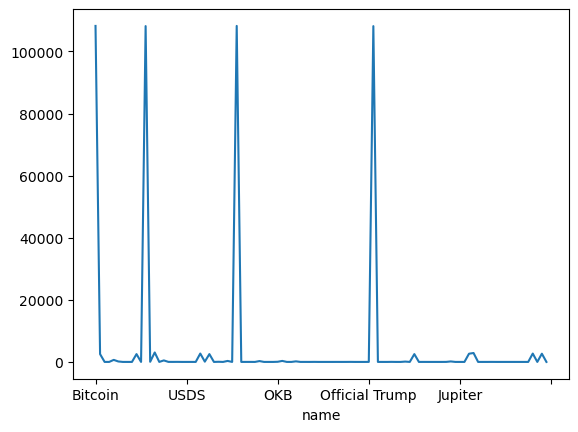

In [44]:
stocks.plot()

name
Lombard Staked BTC      108161.0
Wrapped Bitcoin         108172.0
Bitcoin                 108227.0
Coinbase Wrapped BTC    108229.0
Name: current_price, dtype: float32


<Axes: xlabel='name'>

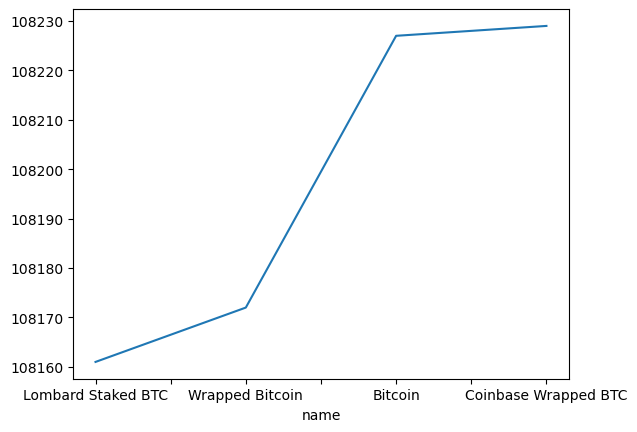

In [45]:
stocks = stocks.sort_values()
print(stocks[-4:])
large_stocks = stocks[-4:]
large_stocks.plot()

<Axes: ylabel='current_price'>

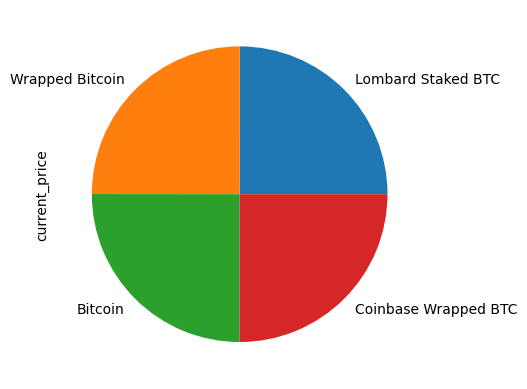

In [46]:
large_stocks.plot(kind="pie")

<Axes: xlabel='name'>

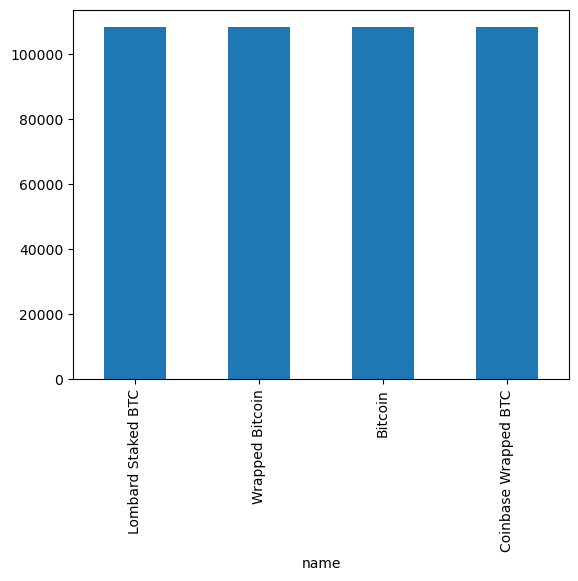

In [47]:
large_stocks.plot(kind="bar")

In [48]:
# astype

# print(stocks.dtype)
# print(sys.getsizeof(stocks.dtype))

# stocks = stocks.astype(dtype=np.int16)
# print(stocks.dtype)
# print(sys.getsizeof(stocks.dtype))

In [49]:
# between

print(stocks[stocks.between(0.3, 0.5)])

name
Sonic         0.309185
Arbitrum      0.327782
Jupiter       0.445381
Pi Network    0.451549
Name: current_price, dtype: float32


In [50]:
# clip
clipped_stocks = stocks.clip(0.4, 0.7)
print(clipped_stocks)

name
Pepe                    0.4
Shiba Inu               0.4
Bonk                    0.4
Pudgy Penguins          0.4
Flare                   0.4
                       ... 
Wrapped stETH           0.7
Lombard Staked BTC      0.7
Wrapped Bitcoin         0.7
Bitcoin                 0.7
Coinbase Wrapped BTC    0.7
Name: current_price, Length: 100, dtype: float64


In [51]:
# drop_duplicates

clipped_stocks = clipped_stocks.drop_duplicates()
print(clipped_stocks)

name
Pepe                                     0.400000
Jupiter                                  0.445381
Pi Network                               0.451549
Optimism                                 0.537113
Mantle                                   0.562357
Cardano                                  0.580568
Stacks                                   0.652441
Artificial Superintelligence Alliance    0.662595
Ondo                                     0.700000
Name: current_price, dtype: float64


In [52]:
# isnull

print(stocks[~stocks.isnull()])

name
Pepe                         0.000010
Shiba Inu                    0.000012
Bonk                         0.000022
Pudgy Penguins               0.015965
Flare                        0.016678
                            ...      
Wrapped stETH             3042.520020
Lombard Staked BTC      108161.000000
Wrapped Bitcoin         108172.000000
Bitcoin                 108227.000000
Coinbase Wrapped BTC    108229.000000
Name: current_price, Length: 100, dtype: float32


In [53]:
stocks = stocks.dropna()

In [54]:
stocks = stocks.fillna(stocks.mean())

In [55]:
# isin

# print(stocks[stocks.isin([0.4000,0.443570])])
print(stocks[stocks.isin([0.4000, 0.443570])])

Series([], Name: current_price, dtype: float32)


In [56]:
# apply

stocks = stocks.apply(lambda x: np.round(x, 4))
print(stocks[:5])

name
Pepe              0.0000
Shiba Inu         0.0000
Bonk              0.0000
Pudgy Penguins    0.0160
Flare             0.0167
Name: current_price, dtype: float64


In [57]:
# copy

stocks_copy = stocks.copy()